In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [71]:
'''defining constants'''
m_sun = 1.98840987e30 * constants.G/ \
        (constants.c**3)                    #solar mass in seconds
chirp_mass = 10**6 * m_sun                              #chirp mass
m1 = m2 = chirp_mass / (0.5**(3/5) * (2)**(2/5))
M = m1 + m2                                             #combined mass
mu = m1 * m2 / M                                        #reduced mass
D_L = constants.parsec * 1e9 / constants.speed_of_light #luminosity distance in seconds (1Gpc).
print(D_L)
print(chirp_mass)

1.0292712504814678e+17
4.925328590607734


In [72]:
def coalescence_time(f, chirp_mass):
    'Coalescence time of BBH merger'
    return 5 * (8 * np.pi * f)**(-8/3) * chirp_mass**(-5/3)

fmin = 1e-4                                                      #min freq. for LISA

tc = coalescence_time(fmin, chirp_mass)                          #calculating coalescence time
#print(tc)
f_isco = 1 / (np.pi * 6**(3/2) * 2**(6/5) *chirp_mass)
t_isco = tc - 5 * (8*np.pi*f_isco)**(-8/3) * chirp_mass**(-5/3)
#print(f_isco, t_isco, tc)

In [73]:
N = 10000
t = np.linspace(0, t_isco, N)
def freq(t, tc, chirp_mass):
    'finding frequency as function of time'
    return (((tc - t)/5)**(-3/8)) / (8*np.pi*(chirp_mass**(5/8)))
f_array = freq(t, tc, chirp_mass)
#print(f_array)

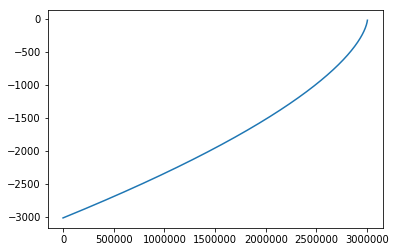

In [74]:
#phase as a fucntion of time
phi_c = 0

def phase(tc, t, ch_mass, phi_c):   #what is this called?????
    return phi_c - 2 * ((tc - t)/(5 * ch_mass))**(5/8)

phase = phase(tc, t, chirp_mass, phi_c)
plt.plot(t, phase)

In [75]:
#defining input angles
theta_Lbar = np.pi/5
phi_Lbar = np.pi/11
theta_sbar = 2*np.pi/7
phi_sbar = 7*np.pi/12
alpha_0 = 0
phi_0 = 0

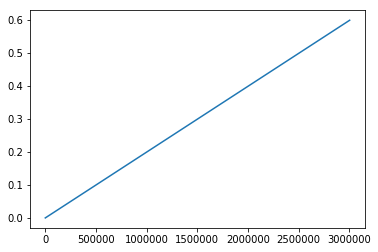

In [76]:
def phi_t_Lbar(time, phi_0):
    'LISA orbital phase'
    return phi_0 + (2*np.pi*time/constants.year)
phi_t_Lbar = phi_t_Lbar(t, phi_0)
#print(phi_t_Lbar)
plt.plot(t, phi_t_Lbar)

In [77]:
def theta_s_t(theta_sbar, phi_t_Lbar, phi_sbar):
    'Source location'
    cos_theta = 0.5 * np.cos(theta_sbar) - (np.sqrt(3)/2)*np.sin(theta_sbar)*np.cos(phi_t_Lbar-phi_sbar)
    return np.arccos(cos_theta)
theta_s_t = theta_s_t(theta_sbar, phi_t_Lbar, phi_sbar)
print(theta_s_t)

[1.06215888 1.06220367 1.06224847 ... 1.48233021 1.4823686  1.48240698]


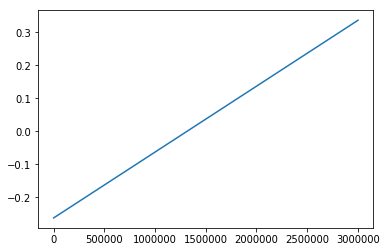

In [78]:
def alpha_i_t(i, t, alpha_0):
    'LISA Arm orientation'
    T = 31536000
    return 2*np.pi*t/T - np.pi/12 - (i-1)*np.pi/3 + alpha_0
alpha_t = alpha_i_t(1, t, alpha_0)
plt.plot(t, alpha_t)

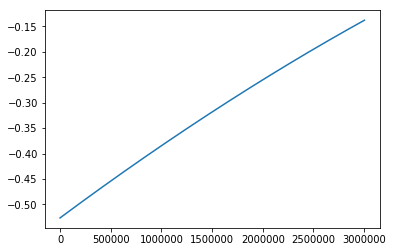

In [79]:
def phi_s_t(theta_sbar, phi_t_bar, phi_s_bar, alpha1):
    'Source location in (unbarred) detector frame'
    return alpha1 + np.pi/12 + np.arctan((np.sqrt(3)*np.cos(theta_sbar) + np.sin(theta_sbar)*np.cos(phi_t_bar - phi_sbar))\
                                   /(2*np.sin(theta_sbar)*np.sin(phi_t_bar - phi_sbar)) )
phi_s_t = phi_s_t(theta_sbar, phi_t_Lbar, phi_sbar, alpha_t)
#print(phi_s_t)
plt.plot(t, phi_s_t)

[-0.66940241 -0.66942911 -0.6694558  ... -0.84436501 -0.84437226
 -0.84437951]


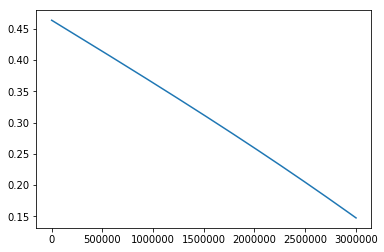

In [80]:
def psi_s_t(theta_Lbar, phi_Lbar, theta_sbar, phi_sbar, phi_t_Lbar):
    'Polarisation angle'
    L_dot_z = 0.5 * np.cos(theta_Lbar) - ( (np.sqrt(3)/2) * np.sin(theta_Lbar) * np.cos(phi_t_Lbar - phi_Lbar) )
    #print(L_dot_z)
    L_dot_n = np.cos(theta_Lbar)*np.cos(theta_sbar) + np.sin(theta_Lbar)*np.sin(theta_sbar)*np.cos(phi_Lbar - phi_sbar)
    global cos_i
    cos_i = L_dot_n
    
    cross = (0.5*np.sin(theta_Lbar)*np.sin(theta_sbar)*np.sin(phi_Lbar - phi_sbar)) - \
    (np.sqrt(3)/2)*np.cos(phi_t_Lbar)*( (np.cos(theta_Lbar)*np.sin(theta_sbar)*np.sin(phi_sbar) - \
                                      np.cos(theta_sbar)*np.sin(theta_Lbar)*np.sin(phi_Lbar)) )\
    - (np.sqrt(3)/2)*np.sin(phi_t_Lbar)*(np.cos(theta_sbar)*np.sin(theta_Lbar)*np.cos(phi_Lbar) - \
                                      np.cos(theta_Lbar)*np.sin(theta_sbar)*np.cos(phi_sbar))
    
    
    print(cross)
    tan_psi = (L_dot_z - L_dot_n * np.cos(theta_s_t)) / cross
    
    return np.arctan(tan_psi)

psi_s_t = psi_s_t(theta_Lbar, phi_Lbar, theta_sbar, phi_sbar, phi_t_Lbar)
#print(psi_s_t)
plt.plot(t, psi_s_t)

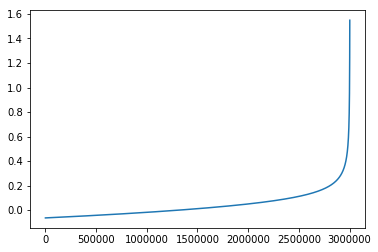

In [81]:
def doppler_phase(f, theta_sbar, phi, phi_sbar):
    'doppler phase due to LISA motion'
    R = constants.astronomical_unit/constants.speed_of_light
    return 2 * np.pi * f * R * np.sin(theta_sbar) * np.cos(phi - phi_sbar)

doppler_phase = doppler_phase(f_array, theta_sbar, phi_t_Lbar, phi_sbar)
#print(doppler_phase)
#print(f_array)
plt.plot(t, doppler_phase)

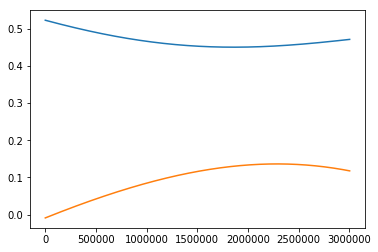

In [82]:
def F_plus(theta_s, phi_s, psi_s):
    'Detector Beam Pattern Coefficient'
    return (0.5 * (1 + np.cos(theta_s)**2) * np.cos(2*phi_s) * np.cos(2*psi_s)) - (np.cos(theta_s) * np.sin(2*phi_s) * np.sin(2*psi_s) )

def F_cross(theta_s, phi_s, psi_s):
    'Detector Beam Pattern Coefficient'
    return (0.5 * (1+np.cos(theta_s)**2) * np.cos(2*phi_s) * np.sin(2*psi_s)) + (np.cos(theta_s) * np.sin(2*phi_s) * np.cos(2*psi_s))

F_plus = F_plus(theta_s_t, phi_s_t, psi_s_t)
#print(F_plus)
F_cross = F_cross(theta_s_t, phi_s_t, psi_s_t)
#print(F_cross)
plt.plot(t, F_plus)
plt.plot(t, F_cross)

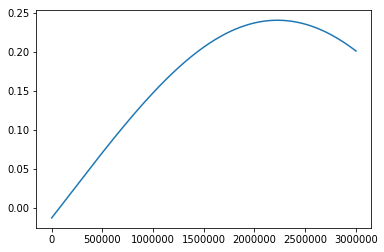

In [83]:
def phi_P_I_t(cos_i, F_plus, F_cross): #change to phi
    'Polarisation Phase'
    return np.arctan( (2*cos_i*F_cross)/((1 + (cos_i**2))*F_plus) )

phi_P_I_t = phi_P_I_t(cos_i, F_plus, F_cross)
#print(psi_P_I_t)
plt.plot(t, phi_P_I_t)

In [84]:
#def h_plus(D_L, ch_mass, f_array, phi):
    
#    return (2/D_L * ch_mass**(5/3) * (np.pi*f_array)**2/3) * (1+(cos_i**2) * np.cos(phi)
                                                              
#def h_cross(D_L, ch_mass, f_array, phi):
    
#    return (2/D_L * ch_mass**(5/3) * (np.pi*f_array)**2/3) * (-2*c os_i * np.sin(phi))

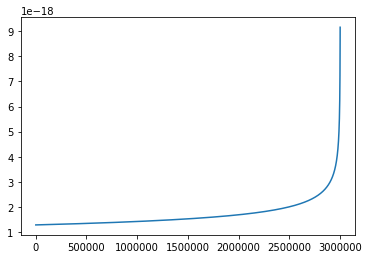

In [85]:
def A_t(M_c, f, D_L):
    'Waveform Amplitude'
    return 2 * M_c**(5/3) * (np.pi*f)**(2/3) / D_L
A_t = A_t(chirp_mass, f_array, D_L)
#print(A_t)
plt.plot(t, A_t)

In [86]:
def A_p_t(F_plus, F_cross, cos_i):
    'Polarization Amplitude'
    return np.sqrt(3)/2 * (((1+cos_i**2)**2 * F_plus**2) + (4 * cos_i**2 * F_cross**2))**(1/2) 
A_p_t = A_p_t(F_plus, F_cross, cos_i)
#plt.plot(t, A_p_t)
print(A_p_t)

[0.5724722  0.57244783 0.57242346 ... 0.52665925 0.52666624 0.52667324]


In [87]:
def strain(A_t, A_p_t, phase, phi_P_I_t, doppler_phase):
    'h(t)'
    return A_t * A_p_t * np.cos(phase + phi_P_I_t + doppler_phase)
strain = strain(A_t, A_p_t, phase, phi_P_I_t, doppler_phase)
#print(strain)

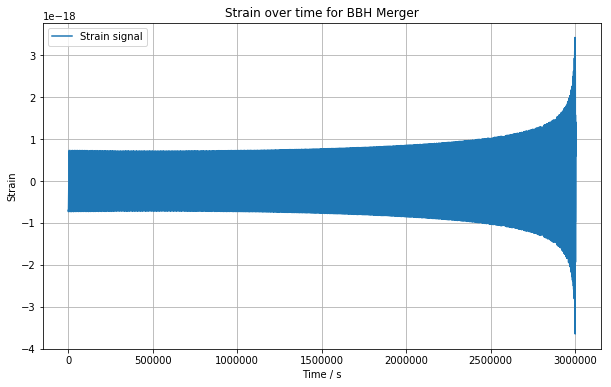

In [88]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, strain, label=f'Strain signal') 
ax.grid()
ax.set_xlabel('Time / s')
ax.set_ylabel('Strain')
ax.legend()
ax.set_title('Strain over time for BBH Merger')
plt.show()

In [89]:
def phi_f(f, phi_c, chirp_mass):
    'phase as func of freq'
    return phi_c - 2*(8*np.pi*chirp_mass*f)**(-5/3)
phi_f_t = phi_f(f_array, phi_c, chirp_mass)

In [99]:
def fft(A_p_t, f, chirp_mass, D_L, phi_f, phi_p_t, phi_d_t):
    return (5/96)**0.5 * np.pi**(-2/3) * (1/D_L) * A_p_t * chirp_mass**(5/6) * f**(-7/6) * np.exp(1j * (phi_f - phi_p_t - phi_d_t))

In [91]:
fourier = fft(A_p_t, f_array, chirp_mass, D_L, phi_f_t, phi_P_I_t, doppler_phase)

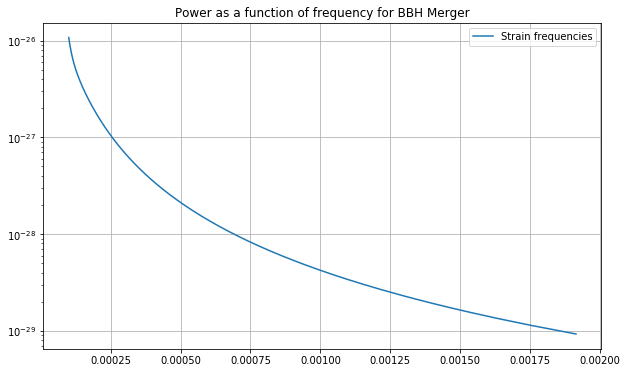

In [93]:
fig2 = plt.figure(figsize=(10,6))
ax = fig2.add_subplot(1, 1, 1)
h_squared = np.abs(fourier)**2
ax.plot(f_array, h_squared, label=f'Strain frequencies') 
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend()
ax.set_title('Power as a function of frequency for BBH Merger')
plt.show()

In [97]:
def h_t():

75